In [1]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [2]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data,
                                                   olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [3]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

199

In [5]:
X_train

array([[0.70247936, 0.74380165, 0.77272725, ..., 0.21900827, 0.45867768,
        0.6363636 ],
       [0.3553719 , 0.39256197, 0.446281  , ..., 0.17355372, 0.18181819,
        0.18595041],
       [0.3305785 , 0.4090909 , 0.5495868 , ..., 0.6983471 , 0.70247936,
        0.59917355],
       ...,
       [0.28099173, 0.19008264, 0.19008264, ..., 0.30578512, 0.3181818 ,
        0.3181818 ],
       [0.338843  , 0.40495867, 0.5082645 , ..., 0.58264464, 0.57024795,
        0.5495868 ],
       [0.6404959 , 0.6818182 , 0.71900827, ..., 0.4090909 , 0.4214876 ,
        0.41735536]], dtype=float32)

In [10]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [40]:
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X_train)
                for k in range(1, 100, 5)]
inertias = [model.inertia_ for model in kmeans_per_k]



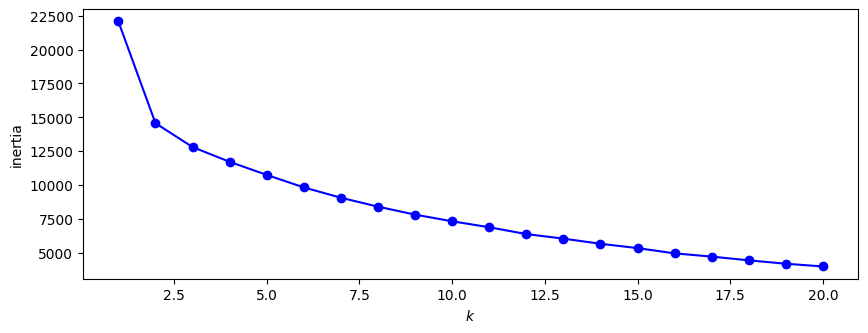

In [42]:
plt.figure(figsize=(10, 3.5))
plt.plot(range(1, 21), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650))
plt.show()

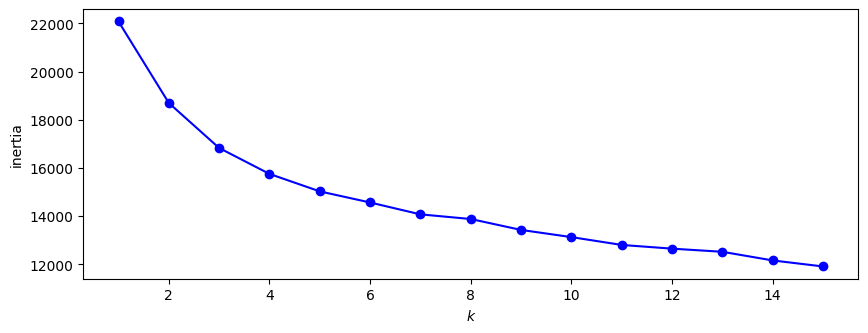

In [46]:
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X_train)
                for k in range(1, 16)]

inertias_1 = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(10, 3.5))
plt.plot(range(1, 16), inertias_1, "bo-")
plt.xlabel("$k$")
plt.ylabel("inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650))
plt.show()

In [69]:
from sklearn.metrics import silhouette_score

kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X_train)
                for k in range(1, 150,10)]

silhouette_scores = [silhouette_score(X_train, model.labels_)
                     for model in kmeans_per_k[1:]]



In [70]:
len(kmeans_per_k)

15

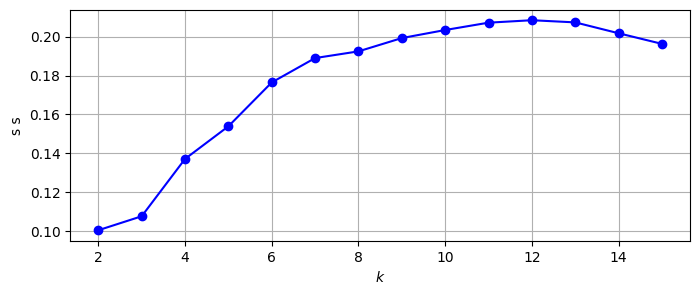

In [71]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 16), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("s s")
plt.grid()
plt.show()

In [72]:
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X_train)
                for k in range(115, 125)]

silhouette_scores = [silhouette_score(X_train, model.labels_)
                     for model in kmeans_per_k[1:]]




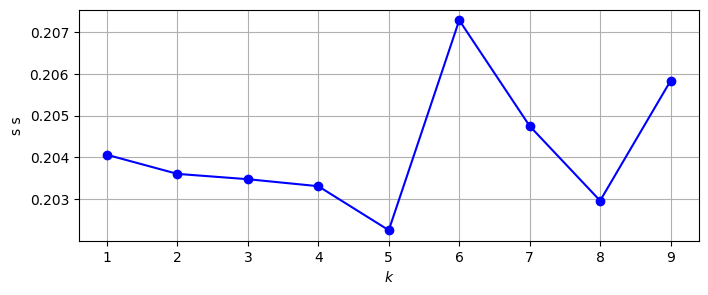

In [84]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("s s")
plt.grid()
plt.show()

In [76]:
silhouette_scores

[0.20406194,
 0.20360425,
 0.20347667,
 0.20330898,
 0.20225413,
 0.20728694,
 0.20475039,
 0.20296149,
 0.20583613]

In [ ]:
silhouette_score(X_train, )